In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
import pickle

2025-05-31 20:21:12.927572: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# -------------------------------
# STEP 1: Load data
# -------------------------------
X_train = np.load("../models/lstm gru/initial/X_train.npy")
X_test = np.load("../models/lstm gru/initial/X_test.npy")
y_train = np.load("../models/lstm gru/initial/y_train.npy")
y_test = np.load("../models/lstm gru/initial/y_test.npy")

with open("../models/lstm gru/initial/tokenizer_lstm.pkl", "rb") as f_tok:
    tokenizer = pickle.load(f_tok)

vocab_size = len(tokenizer.word_index) + 1  # +1 for padding token
max_len = X_train.shape[1]  # usually 50

In [3]:
# -------------------------------
# STEP 2: Build LSTM Model
# -------------------------------
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 classes: negatif, netral, positif

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/Users/macbook/anaconda3/envs/sentiment-analysis-nlp/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# -------------------------------
# STEP 3: Train with EarlyStopping
# -------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.4034 - loss: 1.0854 - val_accuracy: 0.4656 - val_loss: 1.0233
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5627 - loss: 0.9520 - val_accuracy: 0.5399 - val_loss: 0.9816
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8146 - loss: 0.5752 - val_accuracy: 0.5868 - val_loss: 1.0568
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9274 - loss: 0.2459 - val_accuracy: 0.5647 - val_loss: 1.1418
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9616 - loss: 0.1232 - val_accuracy: 0.5592 - val_loss: 1.3456


In [5]:
# -------------------------------
# STEP 4: Save Model
# -------------------------------
model.save("../models/lstm gru/initial/lstm_model_initial.h5")
print("✅ LSTM model awal berhasil dilatih dan disimpan sebagai lstm_model_initial.h5")

✅ LSTM model awal berhasil dilatih dan disimpan sebagai lstm_model_initial.h5


/var/folders/kb/msyd5l4n7xj0yh064xpqdg400000gn/T/ipykernel_24224/3577466881.py:25: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kb/msyd5l4n7xj0yh064xpqdg400000gn/T/ipykernel_24224/3577466881.py:25: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/macbook/anaconda3/envs/sentiment-analysis-nlp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/anaconda3/envs/sentiment-analysis-nlp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


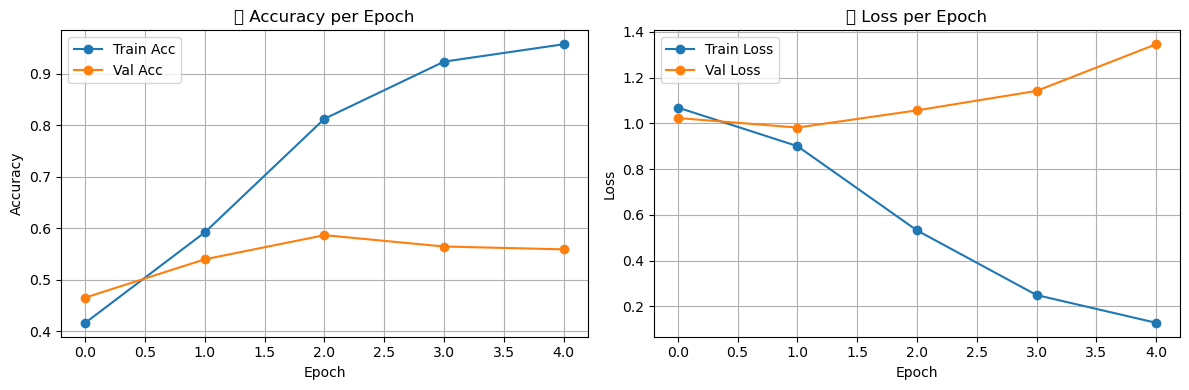

In [6]:
import matplotlib.pyplot as plt

# Visualisasi akurasi
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Acc', marker='o')
plt.title("📈 Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Visualisasi loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title("📉 Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
📋 Classification Report:
              precision    recall  f1-score   support

     negatif       0.60      0.52      0.56       119
      netral       0.52      0.73      0.61       121
     positif       0.51      0.37      0.43       123

    accuracy                           0.54       363
   macro avg       0.54      0.54      0.53       363
weighted avg       0.54      0.54      0.53       363



/var/folders/kb/msyd5l4n7xj0yh064xpqdg400000gn/T/ipykernel_24224/797590913.py:23: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/macbook/anaconda3/envs/sentiment-analysis-nlp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


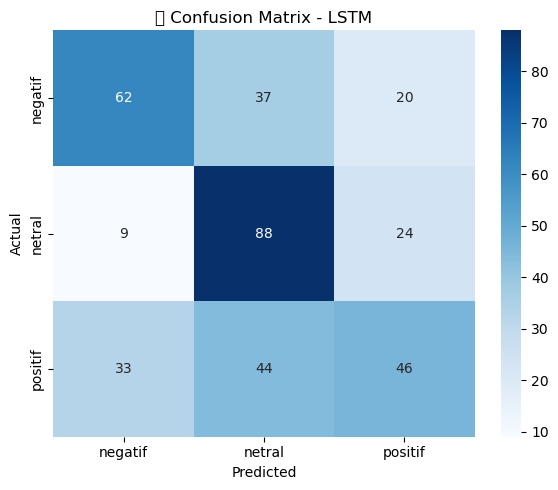

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Prediksi kelas
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("📋 Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=['negatif', 'netral', 'positif']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negatif', 'netral', 'positif'],
            yticklabels=['negatif', 'netral', 'positif'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🧩 Confusion Matrix - LSTM")
plt.tight_layout()
plt.show()


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# GRU Model
model_gru = Sequential()
model_gru.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model_gru.add(GRU(units=64, return_sequences=False))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(3, activation='softmax'))

model_gru.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Training GRU
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_gru = model_gru.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.3816 - loss: 1.0928 - val_accuracy: 0.4738 - val_loss: 1.0606
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6770 - loss: 0.9660 - val_accuracy: 0.5565 - val_loss: 0.9338
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8390 - loss: 0.4736 - val_accuracy: 0.5565 - val_loss: 1.0779
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9619 - loss: 0.1604 - val_accuracy: 0.5399 - val_loss: 1.3826
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9729 - loss: 0.0913 - val_accuracy: 0.5455 - val_loss: 1.4061


In [11]:
# Save model
model_gru.save("../models/lstm gru/initial/gru_model_initial.h5")
print("✅ GRU model awal disimpan sebagai gru_model_initial.h5")

✅ GRU model awal disimpan sebagai gru_model_initial.h5


/var/folders/kb/msyd5l4n7xj0yh064xpqdg400000gn/T/ipykernel_24224/1152086164.py:23: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kb/msyd5l4n7xj0yh064xpqdg400000gn/T/ipykernel_24224/1152086164.py:23: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/macbook/anaconda3/envs/sentiment-analysis-nlp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/anaconda3/envs/sentiment-analysis-nlp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


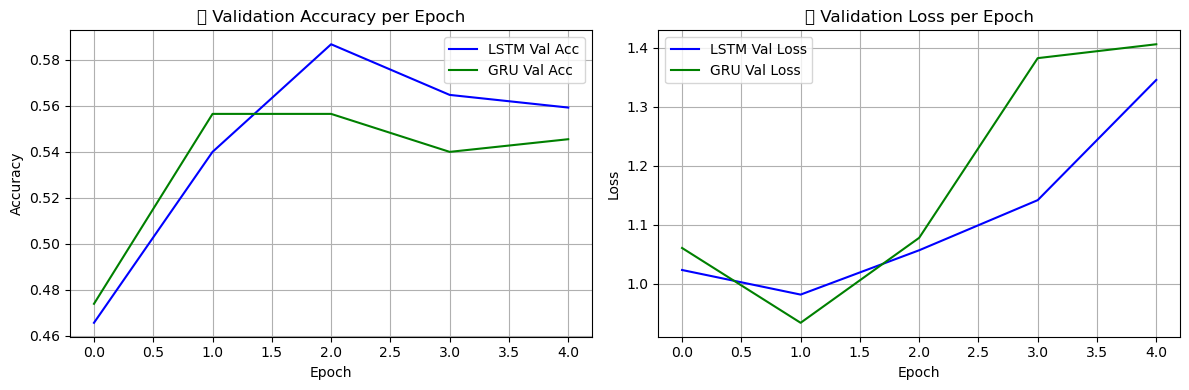

In [12]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='LSTM Val Acc', color='blue')
plt.plot(history_gru.history['val_accuracy'], label='GRU Val Acc', color='green')
plt.title("📈 Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='LSTM Val Loss', color='blue')
plt.plot(history_gru.history['val_loss'], label='GRU Val Loss', color='green')
plt.title("📉 Validation Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
📋 Classification Report - GRU:
              precision    recall  f1-score   support

     negatif       0.56      0.56      0.56       119
      netral       0.60      0.62      0.61       121
     positif       0.50      0.49      0.50       123

    accuracy                           0.56       363
   macro avg       0.56      0.56      0.56       363
weighted avg       0.56      0.56      0.56       363



/var/folders/kb/msyd5l4n7xj0yh064xpqdg400000gn/T/ipykernel_24224/1548431656.py:19: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/macbook/anaconda3/envs/sentiment-analysis-nlp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


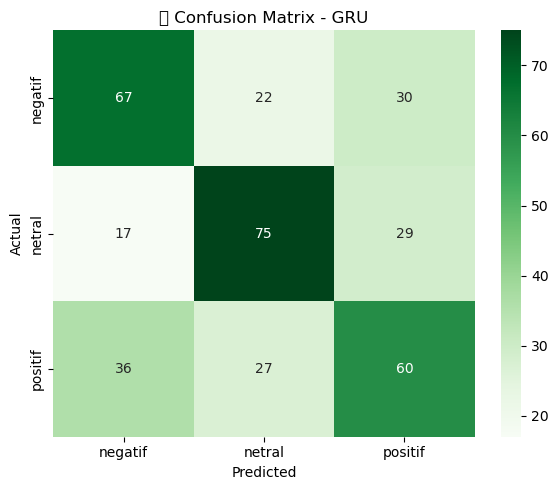

In [13]:
# Predict GRU
y_pred_gru = model_gru.predict(X_test)
y_pred_gru_classes = np.argmax(y_pred_gru, axis=1)

# Report GRU
print("📋 Classification Report - GRU:")
print(classification_report(y_test, y_pred_gru_classes, target_names=['negatif', 'netral', 'positif']))

# Confusion matrix
cm_gru = confusion_matrix(y_test, y_pred_gru_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_gru, annot=True, fmt='d', cmap='Greens',
            xticklabels=['negatif', 'netral', 'positif'],
            yticklabels=['negatif', 'netral', 'positif'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🧩 Confusion Matrix - GRU")
plt.tight_layout()
plt.show()


In [14]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# STEP 1: Predict
# ----------------------------
y_pred_lstm = model.predict(X_test)
y_pred_lstm_class = np.argmax(y_pred_lstm, axis=1)

y_pred_gru = model_gru.predict(X_test)
y_pred_gru_class = np.argmax(y_pred_gru, axis=1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [15]:
# ----------------------------
# STEP 2: Classification Reports
# ----------------------------
print("📋 Classification Report - LSTM")
print(classification_report(y_test, y_pred_lstm_class, target_names=['negatif', 'netral', 'positif']))

print("📋 Classification Report - GRU")
print(classification_report(y_test, y_pred_gru_class, target_names=['negatif', 'netral', 'positif']))

📋 Classification Report - LSTM
              precision    recall  f1-score   support

     negatif       0.60      0.52      0.56       119
      netral       0.52      0.73      0.61       121
     positif       0.51      0.37      0.43       123

    accuracy                           0.54       363
   macro avg       0.54      0.54      0.53       363
weighted avg       0.54      0.54      0.53       363

📋 Classification Report - GRU
              precision    recall  f1-score   support

     negatif       0.56      0.56      0.56       119
      netral       0.60      0.62      0.61       121
     positif       0.50      0.49      0.50       123

    accuracy                           0.56       363
   macro avg       0.56      0.56      0.56       363
weighted avg       0.56      0.56      0.56       363



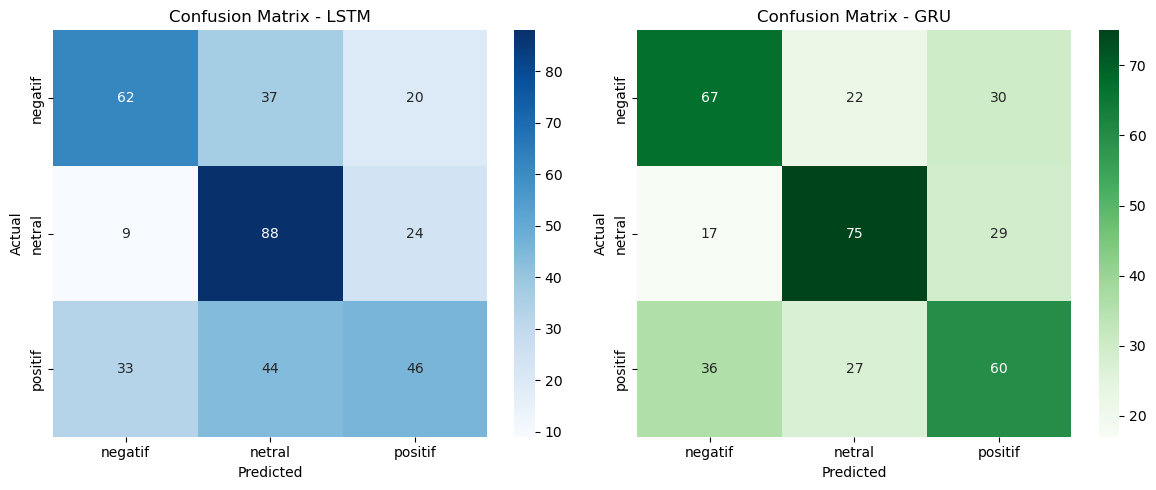

In [16]:
# ----------------------------
# STEP 3: Confusion Matrices
# ----------------------------
cm_lstm = confusion_matrix(y_test, y_pred_lstm_class)
cm_gru = confusion_matrix(y_test, y_pred_gru_class)

plt.figure(figsize=(12, 5))

# LSTM
plt.subplot(1, 2, 1)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negatif', 'netral', 'positif'],
            yticklabels=['negatif', 'netral', 'positif'])
plt.title("Confusion Matrix - LSTM")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# GRU
plt.subplot(1, 2, 2)
sns.heatmap(cm_gru, annot=True, fmt='d', cmap='Greens',
            xticklabels=['negatif', 'netral', 'positif'],
            yticklabels=['negatif', 'netral', 'positif'])
plt.title("Confusion Matrix - GRU")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

In [17]:
# ----------------------------
# STEP 4: F1 Comparison Summary
# ----------------------------
f1_lstm = f1_score(y_test, y_pred_lstm_class, average='macro')
f1_gru = f1_score(y_test, y_pred_gru_class, average='macro')

print("🎯 F1 Score (Macro):")
print(f"LSTM: {f1_lstm:.4f}")
print(f"GRU : {f1_gru:.4f}")

🎯 F1 Score (Macro):
LSTM: 0.5316
GRU : 0.5563


In [18]:
import pickle

# Simpan model LSTM
with open("../models/lstm gru/initial/lstm_model_final.pkl", "wb") as f_lstm:
    pickle.dump(model, f_lstm)

# Simpan model GRU
with open("../models/lstm gru/initial/gru_model_final.pkl", "wb") as f_gru:
    pickle.dump(model_gru, f_gru)

print("✅ Semua model dan preprocessing berhasil diekspor ke .pkl")

✅ Semua model dan preprocessing berhasil diekspor ke .pkl
